In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler


In [3]:
df =pd.read_csv('../input/nslkdd/KDDTrain+.txt')


In [4]:
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [6]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome'])

In [7]:
df.columns = columns

In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
df['outcome'].describe()

count    125972.000000
mean         19.504056
std           2.291512
min           0.000000
25%          18.000000
50%          20.000000
75%          21.000000
max          21.000000
Name: outcome, dtype: float64

In [10]:
df['outcome'].unique()

array([15, 19, 21, 18, 20, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4])

In [11]:
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [12]:
df.drop(columns='outcome',axis=1, inplace=True )


In [13]:
attack = df.attack.map(lambda x: 0 if x == 'normal' else 1)
df['attack'] = attack

df['attack'].unique()

array([0, 1])

In [14]:
df['attack']


0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack, Length: 125972, dtype: int64

In [15]:
df['attack'].value_counts()


attack
0    67342
1    58630
Name: count, dtype: int64

<Axes: xlabel='attack', ylabel='count'>

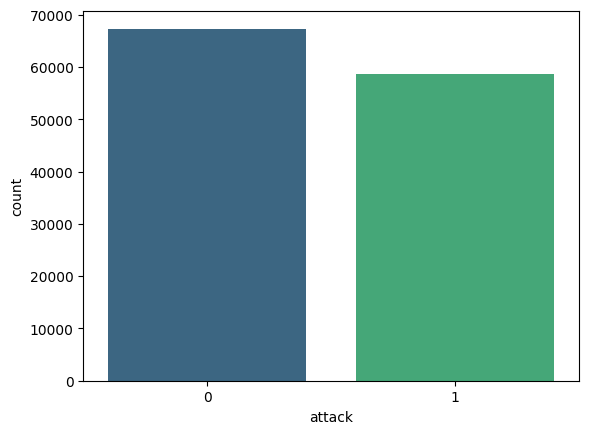

In [16]:
sns.countplot(x='attack', data=df, palette='viridis')


In [17]:
df['protocol_type'].value_counts()

protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

<Axes: xlabel='protocol_type', ylabel='count'>

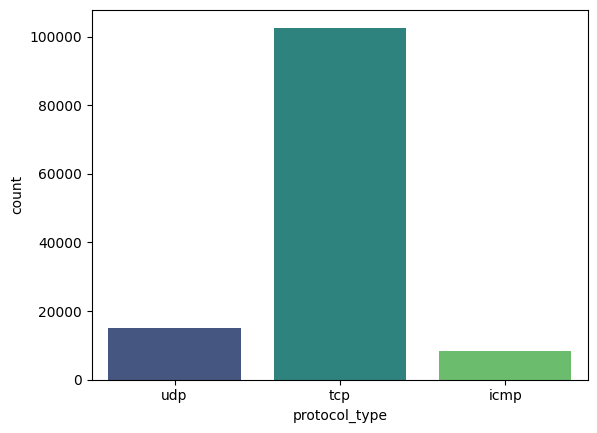

In [18]:
sns.countplot(x='protocol_type', data=df, palette='viridis')


<Axes: xlabel='protocol_type', ylabel='count'>

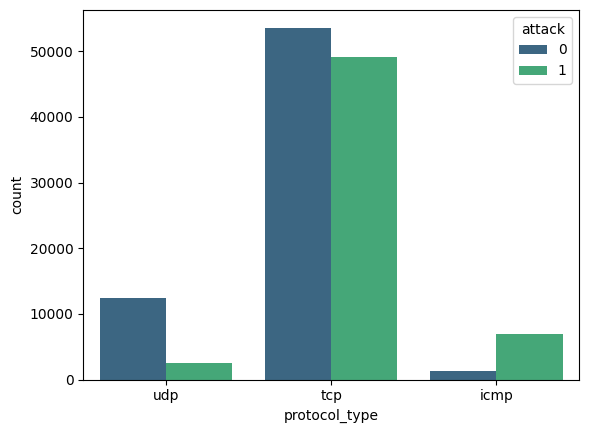

In [19]:
sns.countplot(x='protocol_type', hue='attack', data=df, palette='viridis')


<Axes: xlabel='count', ylabel='service'>

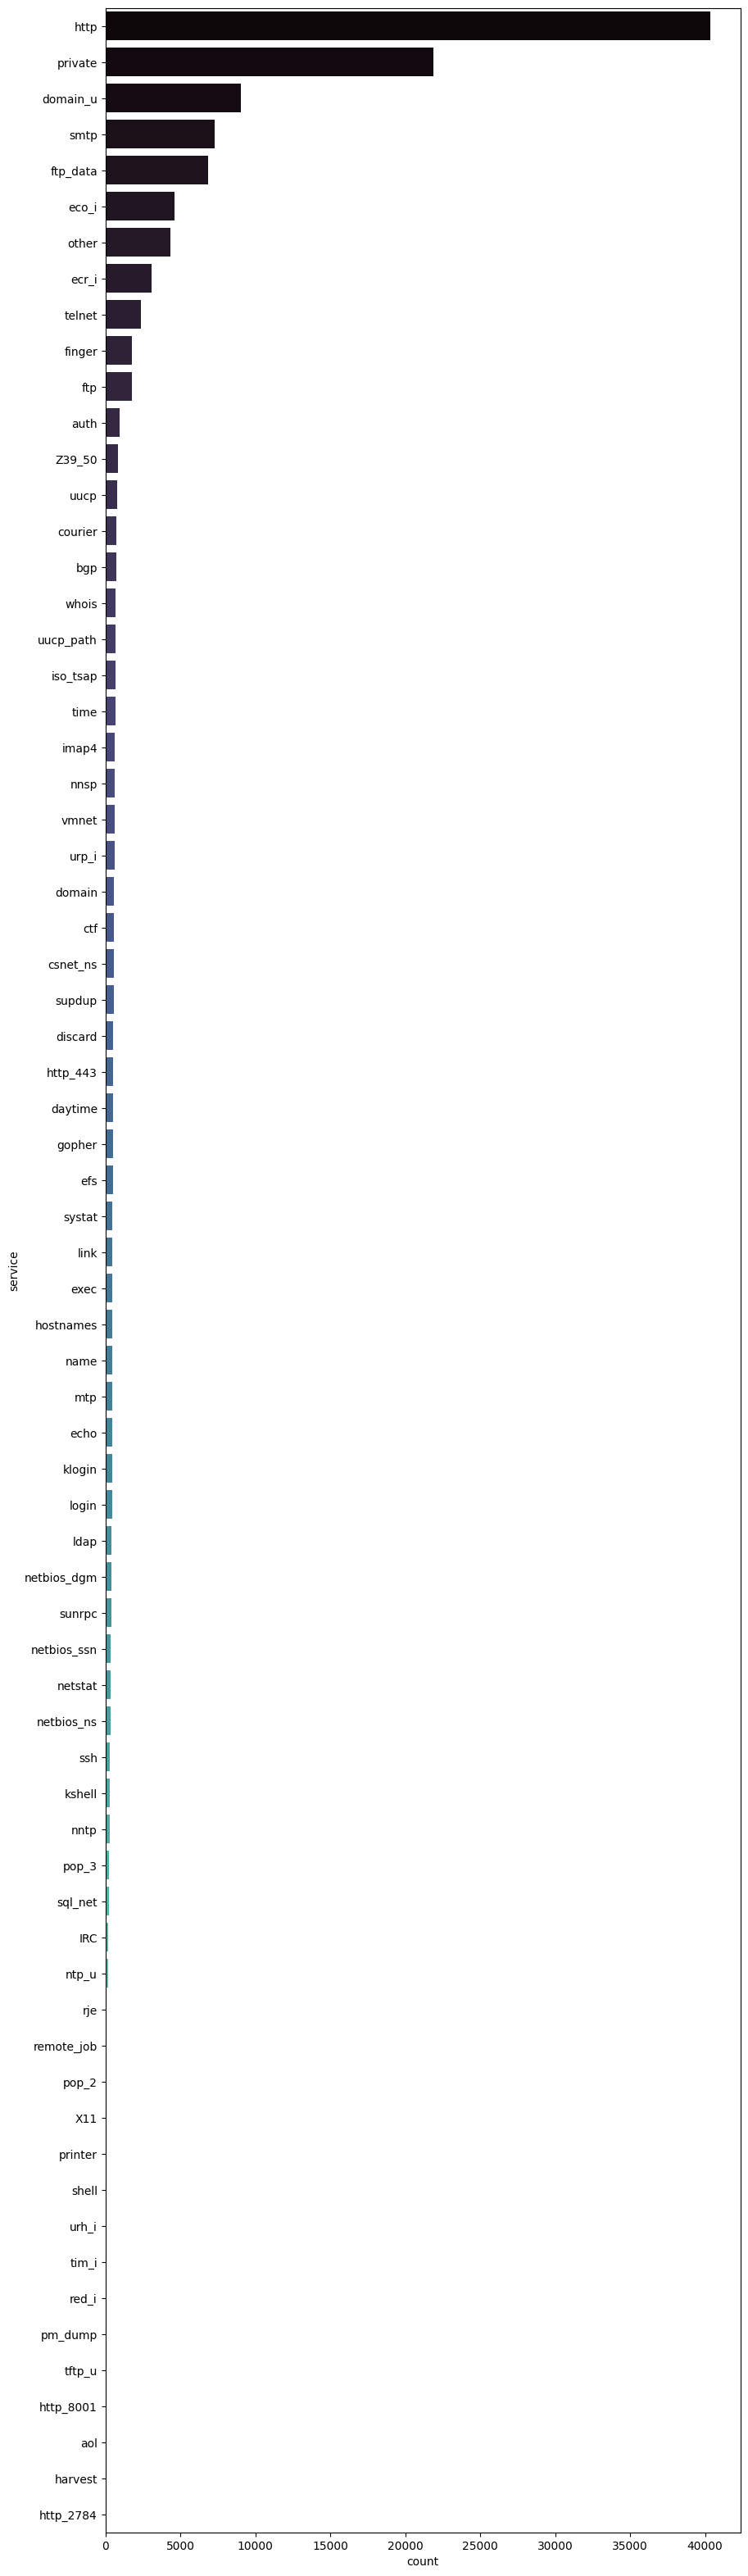

In [20]:
plt.figure(figsize=(10,40))

sns.countplot(palette='mako', y='service' , data=df, order = df['service'].value_counts().index)

<Axes: xlabel='flag', ylabel='count'>

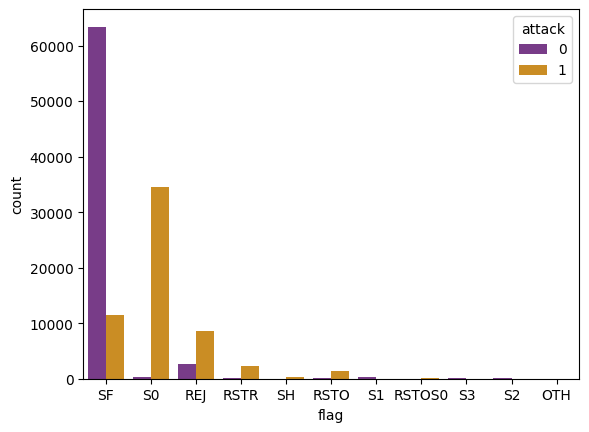

In [21]:
sns.countplot(x='flag',hue='attack' , data = df , palette ='CMRmap')


In [22]:
catData = df.select_dtypes(['object']).columns
catData

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [23]:
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [24]:
df['protocol_type'] = protocol_type_le.fit_transform(df['protocol_type'])
df['service'] = service_le.fit_transform(df['service'])
df['flag'] = flag_le.fit_transform(df['service'])

<Axes: >

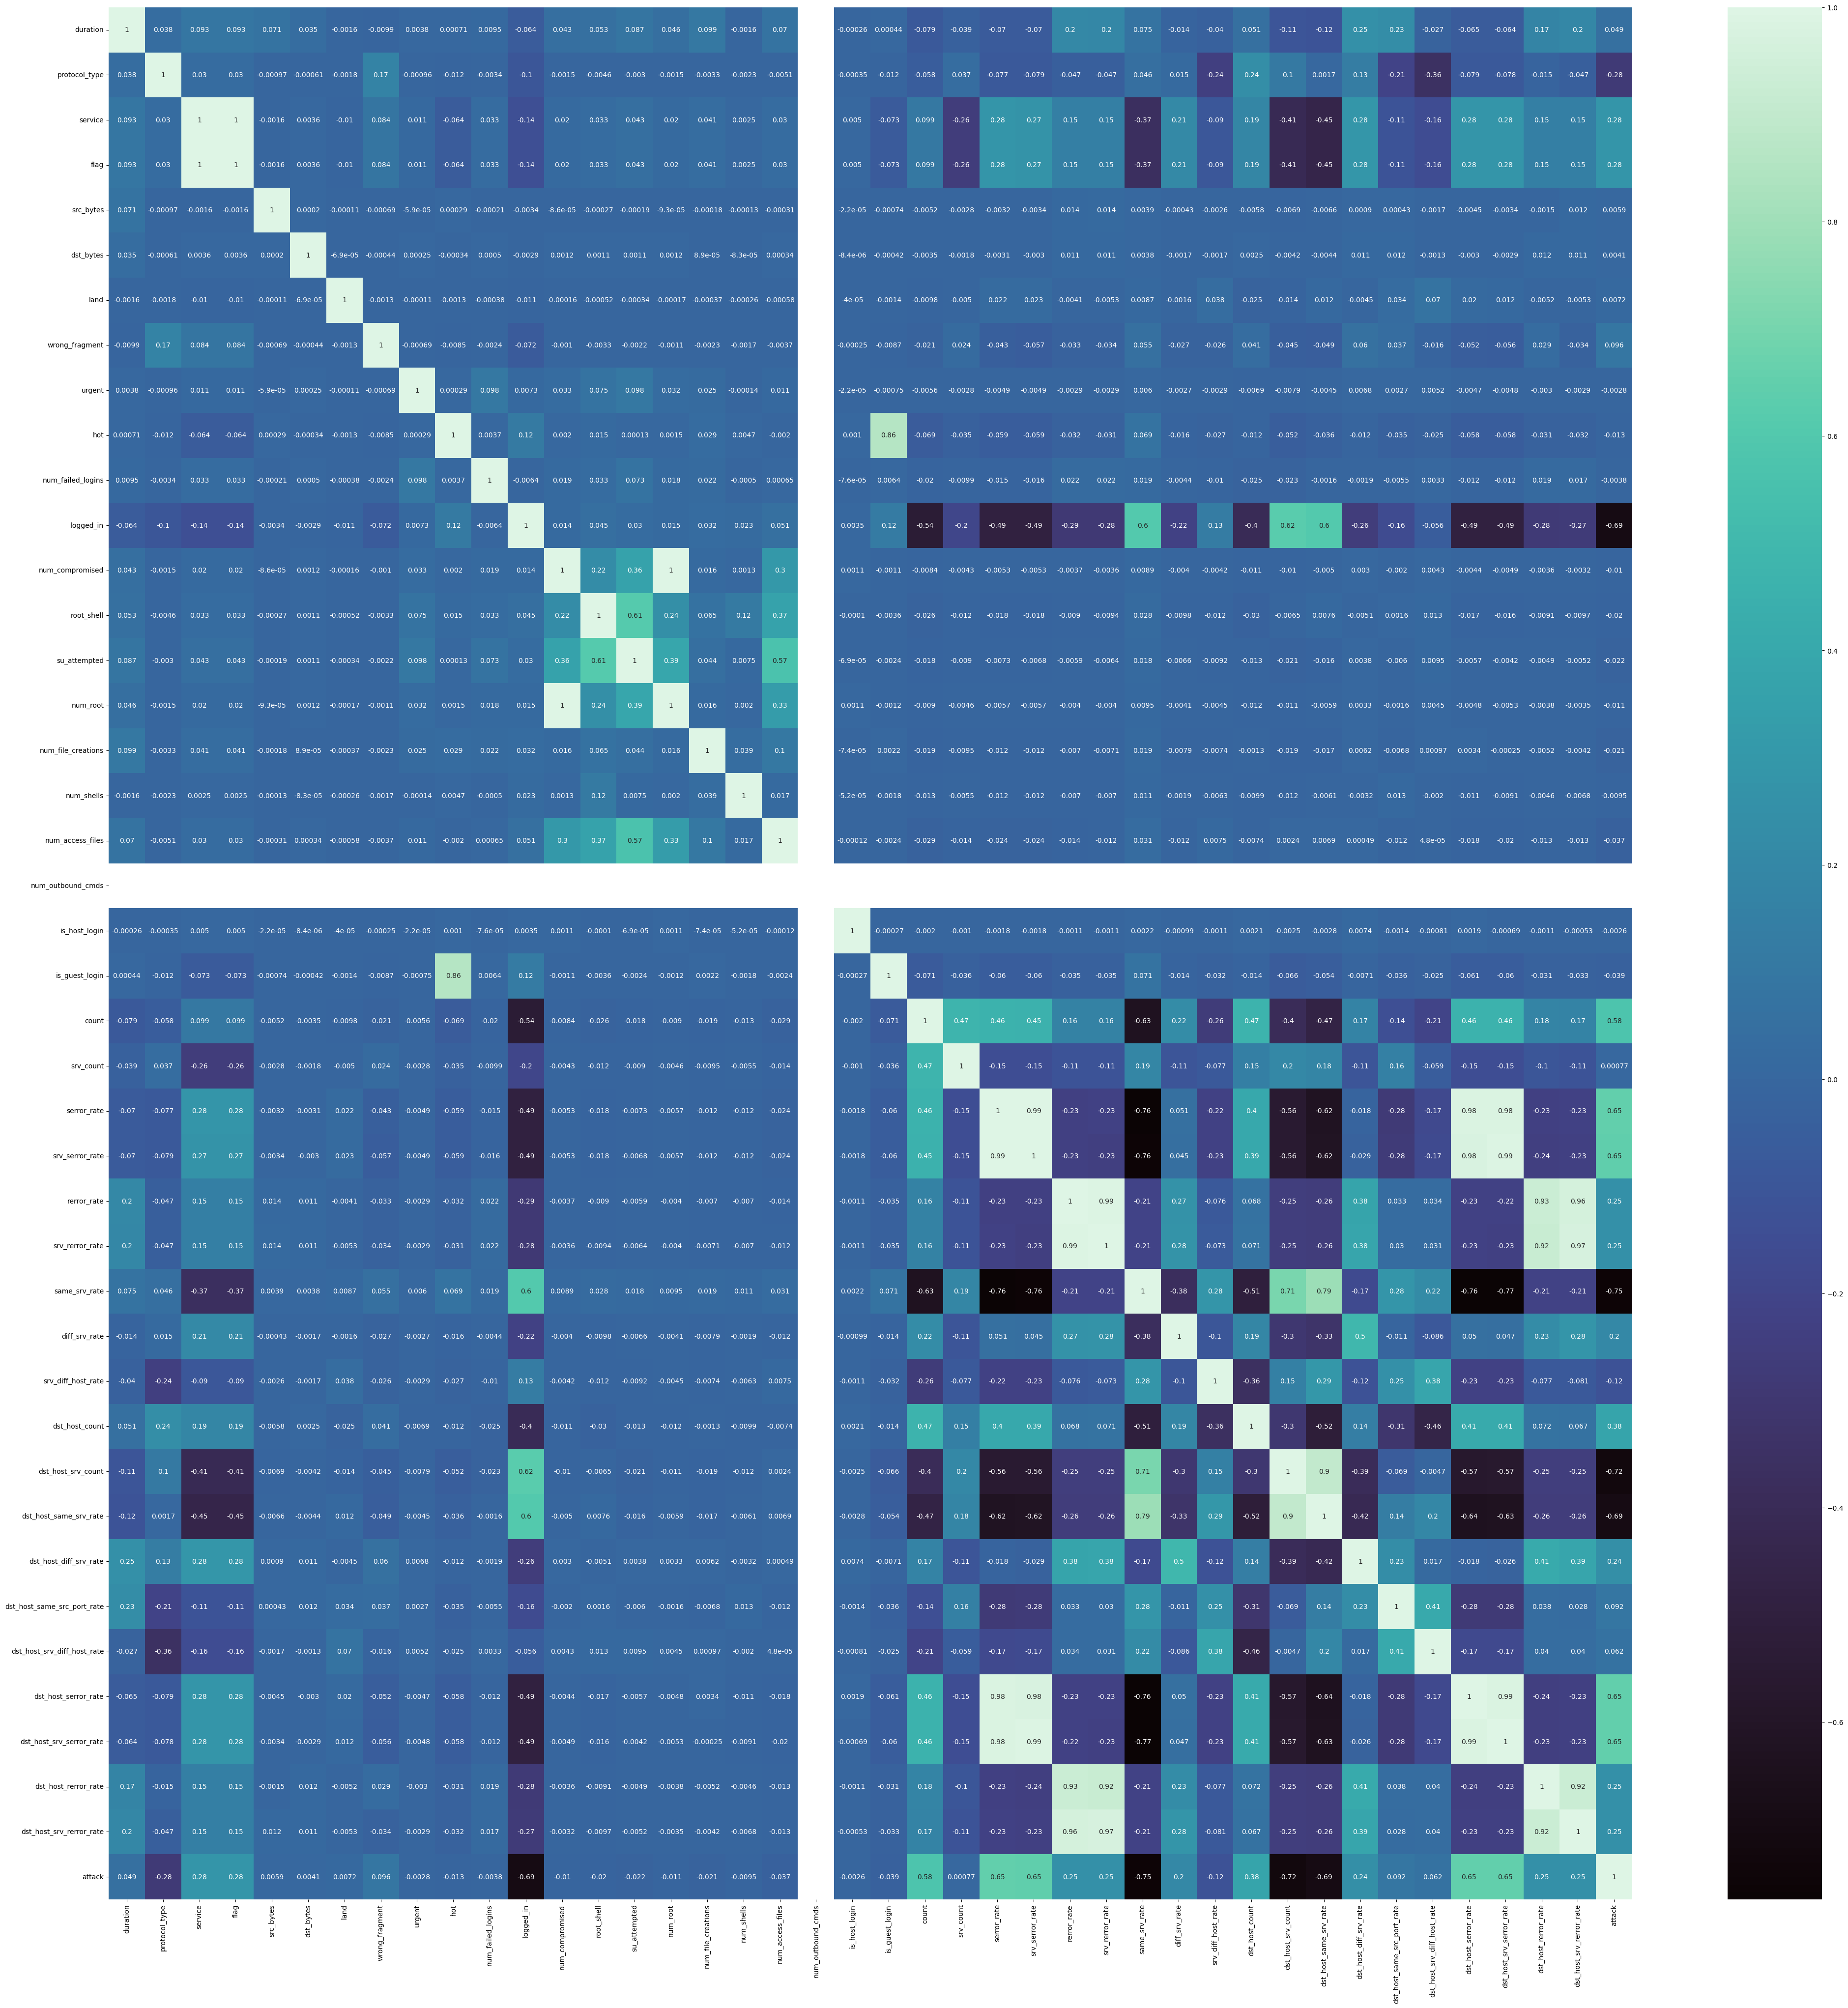

In [25]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot= True,cmap='mako')

In [26]:
y = df['attack']
X = df.drop(['attack'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=40)



In [27]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)



In [28]:
target_class = df['attack'].unique()
target_class

array([0, 1])

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     20006
           1       0.80      0.97      0.88     17786

    accuracy                           0.87     37792
   macro avg       0.88      0.88      0.87     37792
weighted avg       0.89      0.87      0.87     37792



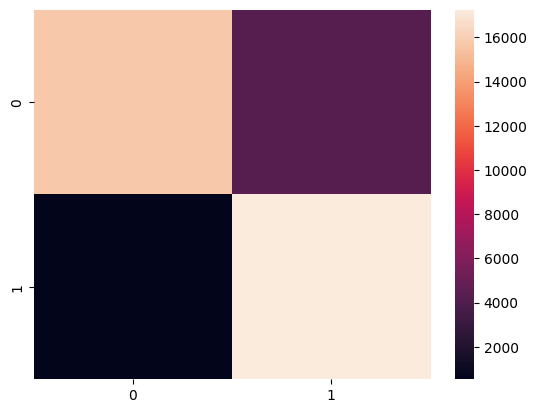

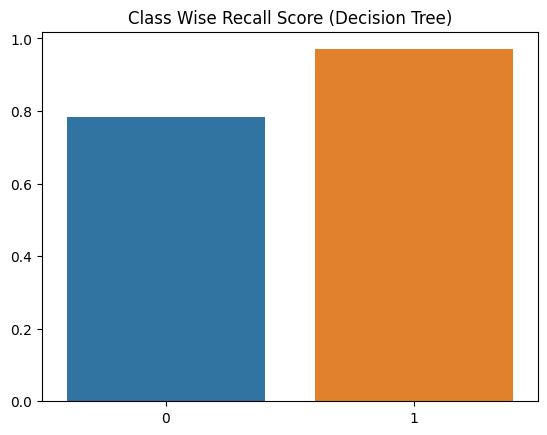

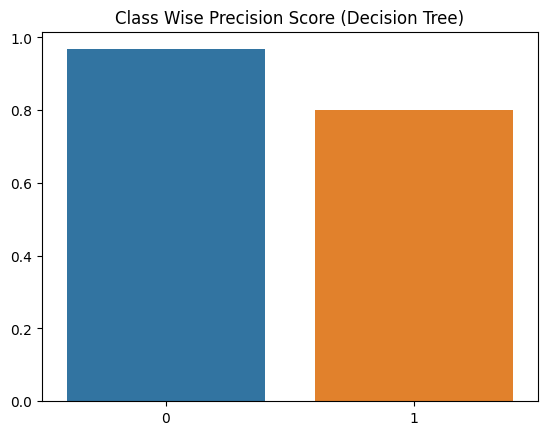

In [29]:
DTC_Classifier = tree.DecisionTreeClassifier()
DTC_Classifier.fit(x_train, y_train)

y_pred = DTC_Classifier.predict( x_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (Decision Tree)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (Decision Tree)")
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20006
           1       0.99      0.99      0.99     17786

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



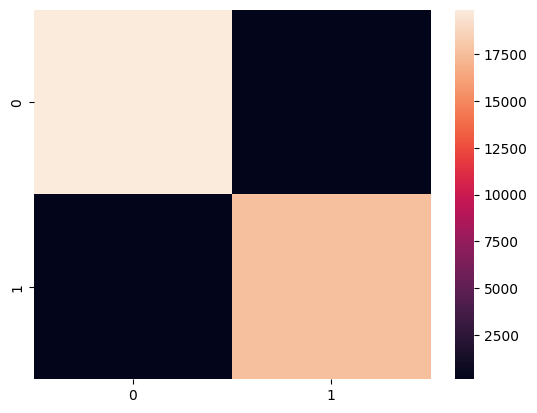

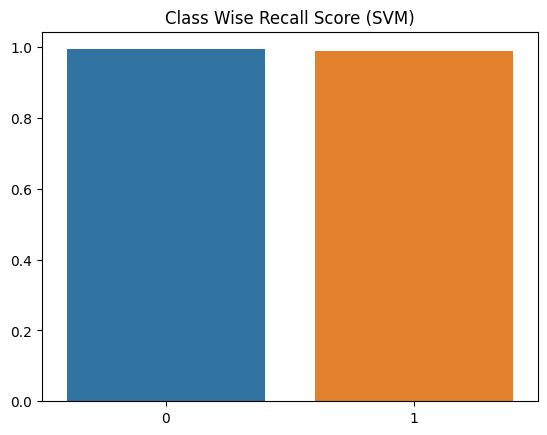

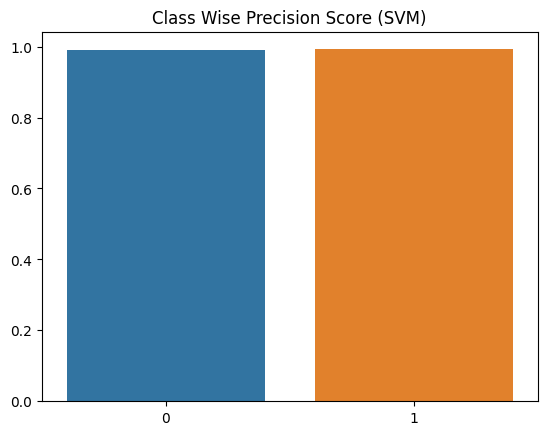

In [30]:
clf = SVC()
clf.fit( x_train , y_train )

y_pred = clf.predict( x_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (SVM)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (SVM)")
plt.show()
